In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import os

This tutorial assumes that you already have a set of matrices...

In [2]:
top_dir = Path("./")
data_dir = top_dir/"fc_data/"

In [3]:
!ls

README.md
__pycache__
cpm.py
cpm_tutorial.ipynb
cpm_wrapper.py
fc_data
unrelated_subIDs_n338.txt
unrestricted_behav_data_n338.csv
unrestricted_esfinn_11_1_2019_12_58_49.csv
unrestricted_esfinn_12_4_2019_22_24_3.csv


In [4]:
subj_list = pd.read_csv('unrelated_subIDs_n338.txt', header=None)
subj_list = np.array(subj_list, dtype=str).flatten()

Let's read in one subject's matrix and make sure it looks reasonable:

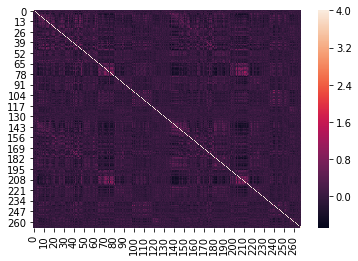

In [6]:
tmp = np.loadtxt(data_dir/'100206_WM_Ave_FZ_GSR_full.txt')
sns.heatmap(tmp)

In [7]:
all_behav_data = pd.read_csv('unrestricted_behav_data_n338.csv', dtype={'Subject': str})
all_behav_data.set_index('Subject', inplace=True)
print(all_behav_data.shape)
all_behav_data.head()

(338, 581)


,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100206,S900,Q11,M,26-30,True,1,1,4,100,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100610,S900,Q08,M,26-30,True,2,1,4,100,True,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
101006,S500,Q06,F,31-35,True,2,2,4,100,True,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
101309,S500,Q06,M,26-30,True,1,1,4,100,True,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
101915,Q3,Q04,F,31-35,True,2,2,4,100,True,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80


In [23]:
def read_in_matrices(subj_list, file_suffix=None, data_dir=data_dir, zscore=False):
    """
    """
    
    all_fc_data = {}
            
    for subj in subj_list:
        # try to find this subject's matrix
        if file_suffix:
            file = [f for f in os.listdir(data_dir) if subj in f and file_suffix in f]
        else:
            file = [f for f in os.listdir(data_dir) if subj in f]
            
        # make sure there is one and only one file    
        if len(file) ==0:
            raise ValueError("No data found for subject {}".format(subj))
        if len(file) >1:
            raise ValueError("More than one matrix found for subject {}! Specify a suffix?".format(subj))
        
        # read it in and make sure it's symmetric and has reasonable dimensions
        tmp = np.loadtxt(data_dir / file[0])
        assert tmp.shape[0]==tmp.shape[1]>1, "Matrix seems to have incorrect dimensions: {}".format(tmp.shape)
        
        # take just the upper triangle and store it in a dictionary
        if ~zscore:
            all_fc_data[subj] = tmp[np.triu_indices_from(tmp, k=1)]
        if zscore:
            all_fc_data[subj] = sp.stats.zscore(tmp[np.triu_indices_from(tmp, k=1)])
        
    # Convert dictionary into dataframe
    all_fc_data = pd.DataFrame.from_dict(all_fc_data, orient='index')
    
    return all_fc_data

In [242]:
all_fc_data = read_in_matrices(subj_list, zscore=True)

In [243]:
all_fc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,35768,35769,35770,35771,35772,35773,35774,35775,35776,35777
100206,-0.100013,2.173667,0.504790,-0.078014,0.480422,-0.261452,0.250617,-0.358924,0.737641,-0.717677,...,0.506482,-0.375846,-0.418152,0.482114,-0.490918,-0.173456,0.746102,0.565710,-0.019124,-0.344709
100610,0.179258,0.981567,0.269168,-0.049507,0.905070,1.968774,1.678013,1.185317,1.131660,0.266268,...,0.002336,0.571530,0.288383,0.486695,0.059618,0.691169,0.157505,0.667604,1.498554,0.711834
101006,-0.260378,-0.165323,-0.117992,0.647531,1.380586,1.332863,0.248927,0.162478,1.365331,0.972986,...,0.620540,-0.030369,-1.969015,-1.063453,-0.584268,-0.421932,-0.686364,0.615846,-0.136377,0.538394
101309,0.540928,0.904979,0.003308,0.283595,1.596031,1.594823,2.480788,0.880816,0.876789,1.519516,...,-0.146500,0.109624,0.058077,0.227619,0.372192,0.191375,-0.405846,0.378233,0.135398,-0.088913
101915,0.480527,1.630752,0.713863,-0.052856,0.555758,0.573097,1.246658,-1.343847,1.004799,-0.520704,...,0.368266,-0.254454,1.088847,0.565750,1.644858,0.796442,0.063812,-0.428428,0.398829,0.559285


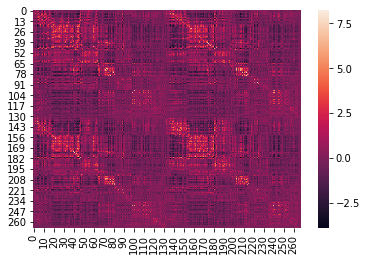

In [245]:
sns.heatmap(sp.spatial.distance.squareform(all_fc_data.iloc[0,:]))

In [9]:
def mk_kfold_indices(subj_list, k = 10):
    """
    Splits list of subjects into k folds
    """
    n_subs = len(subj_list)
    n_subs_per_fold = n_subs//k # floor integer for n_subs_per_fold

    indices = [[fold_no]*n_subs_per_fold for fold_no in range(k)] # generate repmat list of indices
    remainder = n_subs % k # figure out how many subs are leftn over
    remainder_inds = list(range(remainder))
    indices = [item for sublist in indices for item in sublist]    
    [indices.append(ind) for ind in remainder_inds] # add indices for remainder subs

    assert len(indices)==n_subs, "Length of indices list does not equal number of subjects, something went wrong"

    np.random.shuffle(indices) # shuffles in place

    return np.array(indices)

In [10]:
def split_train_test(subj_list, indices, test_fold):
    """
    For a subj list, k-fold indices, and given fold, returns lists of train_subs and test_subs
    """

    train_inds = np.where(indices!=test_fold)
    test_inds = np.where(indices==test_fold)

    train_subs = []
    for sub in subj_list[train_inds]:
        train_subs.append(sub)

    test_subs = []
    for sub in subj_list[test_inds]:
        test_subs.append(sub)

    return (train_subs, test_subs)

In [11]:
indices = mk_kfold_indices(subj_list)

In [12]:
train_subs, test_subs = split_train_test(subj_list, indices, 0)

In [13]:
len(test_subs)

34

In [14]:
def get_train_test_data(all_fc_data, train_subs, test_subs, behav_data, behav):

    """
    Extracts requested FC and behavioral data for a list of train_subs and test_subs
    """

    train_vcts = all_fc_data.loc[train_subs, :]
    test_vcts = all_fc_data.loc[test_subs, :]

    train_behav = behav_data.loc[train_subs, behav]

    return (train_vcts, train_behav, test_vcts)

In [15]:
def select_features(train_vcts, train_behav, r_thresh=0.2, corr_type='pearson'):

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    # Correlate all edges with behav vector
    if corr_type =='pearson':
        cov = np.dot(train_behav.T - train_behav.mean(), train_vcts - train_vcts.mean(axis=0)) / (train_behav.shape[0]-1)
        corr = cov / np.sqrt(np.var(train_behav, ddof=1) * np.var(train_vcts, axis=0, ddof=1))
    elif corr_type =='spearman':
        corr = []
        for edge in train_vcts.columns:
            r_val = sp.stats.spearmanr(train_vcts.loc[:,edge], train_behav)[0]
            corr.append(r_val)

    # Define positive and negative masks
    mask_dict = {}
    mask_dict["pos"] = corr > r_thresh
    mask_dict["neg"] = corr < -r_thresh
    
    print("r_thresh is {}".format(r_thresh))
    print("Found {} edges positively correlated with behavior in the training set".format(mask_dict["pos"].sum()))
    print("Found {} edges negatively correlated with behavior in the training set".format(mask_dict["neg"].sum()))

    return mask_dict

In [16]:
def build_model(train_vcts, mask_dict, train_behav):

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    model_dict = {}

    # Loop through pos and neg tails
    X_glm = np.zeros((train_vcts.shape[0], len(mask_dict.items())))

    t = 0
    for tail, mask in mask_dict.items():
        X = train_vcts.values[:, mask].sum(axis=1)
        X_glm[:, t] = X
        y = train_behav
        (slope, intercept) = np.polyfit(X, y, 1)
        model_dict[tail] = (slope, intercept)
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    model_dict["glm"] = tuple(np.linalg.lstsq(X_glm, y, rcond=None)[0])

    return model_dict

In [17]:
def apply_model(test_vcts, mask_dict, model_dict):

    behav_pred = {}

    X_glm = np.zeros((test_vcts.shape[0], len(mask_dict.items())))

    # Loop through pos and neg tails
    t = 0
    for tail, mask in mask_dict.items():
        X = test_vcts.loc[:, mask].sum(axis=1)
        X_glm[:, t] = X

        slope, intercept = model_dict[tail]
        behav_pred[tail] = slope*X + intercept
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    behav_pred["glm"] = np.dot(X_glm, model_dict["glm"])

    return behav_pred

In [18]:
fc_data.index.values

NameError: name 'fc_data' is not defined

In [19]:
def cpm_wrapper(all_fc_data, all_behav_data, behav, k=10, **cpm_kwargs):

    assert all_fc_data.index.equals(all_behav_data.index), "Row (subject) indices of FC vcts and behavior don't match!"

    subj_list = all_fc_data.index # get subj_list from df index
    
    indices = mk_kfold_indices(subj_list, k=k)
    
    # Initialize df for storing predicted behavior
    all_behav_pred = pd.DataFrame(index=subj_list, columns = ["pos", "neg", "glm"])

    for fold in range(k):
        print("doing fold {}".format(fold))
        train_subs, test_subs = split_train_test(subj_list, indices, test_fold=fold)
        train_vcts, train_behav, test_vcts = get_train_test_data(all_fc_data, train_subs, test_subs, all_behav_data, behav=behav)
        mask_dict = select_features(train_vcts, train_behav, **cpm_kwargs)
        model_dict = build_model(train_vcts, mask_dict, train_behav)
        behav_pred = apply_model(test_vcts, mask_dict, model_dict)
        for tail, predictions in behav_pred.items():
            all_behav_pred.loc[test_subs, tail] = predictions
    
    return all_behav_pred

In [24]:
all_fc_data = read_in_matrices(subj_list, file_suffix='WM')
cpm_kwargs = {'r_thresh': 0.15, 'corr_type': 'pearson'}
behav = "PMAT24_A_CR"

all_behav_pred = cpm_wrapper(all_fc_data, all_behav_data, behav=behav, **cpm_kwargs)

doing fold 0
r_thresh is 0.15
Found 1044 edges positively correlated with behavior in the training set
Found 1022 edges negatively correlated with behavior in the training set
doing fold 1
r_thresh is 0.15
Found 1126 edges positively correlated with behavior in the training set
Found 1034 edges negatively correlated with behavior in the training set
doing fold 2
r_thresh is 0.15
Found 1068 edges positively correlated with behavior in the training set
Found 1051 edges negatively correlated with behavior in the training set
doing fold 3
r_thresh is 0.15
Found 1269 edges positively correlated with behavior in the training set
Found 1138 edges negatively correlated with behavior in the training set
doing fold 4
r_thresh is 0.15
Found 1164 edges positively correlated with behavior in the training set
Found 1016 edges negatively correlated with behavior in the training set
doing fold 5
r_thresh is 0.15
Found 1168 edges positively correlated with behavior in the training set
Found 1021 edges 

(0.3756073474639167, 9.124194298019435e-13)


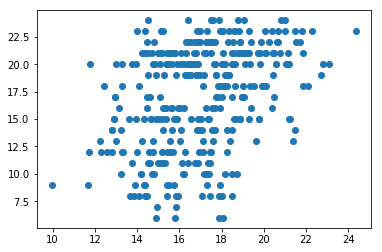

In [25]:
print(sp.stats.pearsonr(all_behav_pred["pos"], all_behav_data[behav]))
plt.scatter(all_behav_pred["pos"], all_behav_data[behav])

In [233]:
behav

'PMAT24_A_CR'

In [228]:
from sklearn.metrics import r2_score

r2_score(all_behav_data[behav], all_behav_pred["pos"])

-0.011726144064064803

In [240]:
subj_list

array(['100206', '100610', '101006', '101309', '101915', '102311',
       '102513', '103414', '103515', '103818', '105115', '106016',
       '107321', '107422', '108121', '108222', '110007', '110411',
       '110613', '112112', '112314', '112920', '113619', '113922',
       '116524', '118124', '118528', '119126', '121416', '122822',
       '123117', '124422', '124826', '127630', '128632', '129028',
       '129129', '129634', '130013', '130316', '130417', '131217',
       '131823', '132017', '133019', '133827', '134021', '134223',
       '134425', '134728', '135528', '135730', '135932', '136732',
       '136833', '137229', '137633', '138231', '139233', '139637',
       '139839', '140117', '141119', '141826', '144125', '144731',
       '146129', '146432', '146533', '146937', '147030', '148133',
       '149236', '149337', '149539', '149842', '150625', '150928',
       '151627', '152831', '153227', '154229', '154532', '154734',
       '154835', '154936', '155635', '155938', '157942', '1580